In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

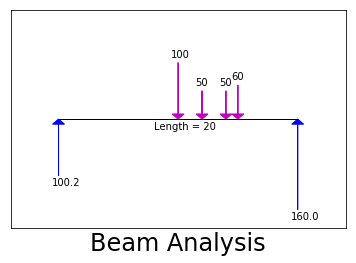

In [48]:
def calcReactions(loadIntensity, a, length):
    rightReactions = 0
    leftReactions = 0.2
    for index in range(0,len(loadIntensity)):
        rightReaction = loadIntensity[index]*a[index] / length
        leftReaction = loadIntensity[index] - rightReaction
        rightReactions += rightReaction
        leftReactions += leftReaction
    
    return(leftReactions,rightReactions)

def GetNormalisedValues(loadIntensity):
    normalisationValue = max(loadIntensity)
    return 10/normalisationValue

class PlottingClass:
    def __init__(self,normalisedValue):
        self.NormalisedValue = normalisedValue
        
  
    def PlotBoundingBox(self,ax, beamLength,load):
        leftBoundLim = -1*beamLength*0.2
        rightBoundLim = beamLength*1.2
        bottomBoundLim = -1.2*load*self.NormalisedValue
        topBoundLim = load*self.NormalisedValue*1.2
        ax.set_xlim(leftBoundLim,rightBoundLim)
        ax.set_ylim(bottomBoundLim,topBoundLim)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel("Beam Analysis",fontsize=24)
    
    def PlotSpan(self,ax,beamLength):
        lineWidth = 1
        ax.hlines(y=0, xmin=0, xmax=beamLength, linewidth=lineWidth, color='black')
        ax.text(0.4*beamLength,-1.2*lineWidth,"Length = "+str(beamLength))

    def PlotLoadsAndReactions(self,ax, dist, load, isReaction):
        arrowHeadLength = 9*self.NormalisedValue
        for loadIndex in range(0,len(dist)):
            color = 'm'
            x = dist[loadIndex]
            dx = 0
            y = load[loadIndex]*self.NormalisedValue
            dy = -load[loadIndex]*self.NormalisedValue + arrowHeadLength
            text_y = y+arrowHeadLength
            text_x = x-arrowHeadLength
            if isReaction:
                color = 'b'
                x = dist[loadIndex]
                dx = 0
                y = -1*load[loadIndex]*self.NormalisedValue
                dy = load[loadIndex]*self.NormalisedValue - arrowHeadLength
                text_y = y-arrowHeadLength*2
            
            ax.arrow(x, y, dx, dy, head_width=1.0, head_length=arrowHeadLength, fc=color, ec=color)
            ax.text(text_x,text_y,str(load[loadIndex]))
        

loadDist =[10,12,14,15]
loadIntensities = [100,50,50,60]
spanLength = 20
leftReaction, rightReaction = calcReactions(loadIntensities,loadDist,spanLength)
allForces = loadIntensities
allForces.append(leftReaction)
allForces.append(rightReaction)

normalisationValue = GetNormalisedValues(allForces)

suppReactionList = []
suppReactionDistList = []
suppReactionDistList.append(0)
suppReactionList.append(leftReaction)
suppReactionDistList.append(spanLength)
suppReactionList.append(rightReaction)


fig = plt.figure()
ax = plt.axes()
BeamDiagram = PlottingClass(normalisationValue)
BeamDiagram.PlotBoundingBox(ax, spanLength,max(allForces))
BeamDiagram.PlotSpan(ax, spanLength)
BeamDiagram.PlotLoadsAndReactions(ax, loadDist, loadIntensities, False)
BeamDiagram.PlotLoadsAndReactions(ax, suppReactionDistList, suppReactionList, True)

plt.show()